In [1]:
import ipyleaflet

import solara

zoom = solara.reactive(5)
center = solara.reactive((53.2305799, 6.5323552))
bounds = solara.reactive(None)


@solara.component
def Page():
    # Isolation is required to prevent the map from overlapping navigation (when screen width < 960px)
    with solara.Column(style={"min-width": "500px", "height": "500px", "isolation": "isolate"}):
        # solara components support reactive variables
        solara.SliderInt(label="Zoom level", value=zoom, min=1, max=20)
        # using 3rd party widget library require wiring up the events manually
        # using zoom.value and zoom.set
        ipyleaflet.Map.element(  # type: ignore
            zoom=zoom.value,
            on_zoom=zoom.set,
            center=center.value,
            on_center=center.set,
            on_bounds=bounds.set,
            scroll_wheel_zoom=True,
        )
        solara.Text(f"Zoom: {zoom.value}")
        solara.Text(f"Center: {center.value}")
        solara.Text(f"Bounds: {bounds.value}")

In [2]:
bounds

<Reactive value=None id=0x7fca8cee2cd0>

In [3]:
"""
# ipyleaflet advanced

Extends the [basic ipyleaflet example](/examples/libraries/ipyleaflet) with a marker that can be dragged around, and a
dropdown to select the map style. Two buttons allow to reset the map to the default zoom and center and to zoom
to the marker.
"""
import ipyleaflet

import solara

center_default = (53.2305799, 6.5323552)
zoom_default = 5
maps = {
    "OpenStreetMap.Mapnik": ipyleaflet.basemaps.OpenStreetMap.Mapnik,
    "OpenTopoMap": ipyleaflet.basemaps.OpenTopoMap,
    "Esri.WorldTopoMap": ipyleaflet.basemaps.Esri.WorldTopoMap,
}

zoom = solara.reactive(zoom_default)
center = solara.reactive(center_default)
marker_location = solara.reactive(center_default)

map_name = solara.reactive(list(maps)[0])


@solara.component
def Page():
    def location_changed(location):
        # do things with the location
        marker_location.set(location)

    with solara.Column(style={"min-width": "500px", "height": "500px"}):
        solara.Markdown(f"Market set to: {marker_location.value}", style={"color": "#6e6e6e"})

        map = maps[map_name.value]
        url = map.build_url()

        def goto_marker():
            center.value = marker_location.value
            zoom.value = 13

        def reset_view():
            center.value = center_default
            zoom.value = zoom_default

        solara.Select(label="Map", value=map_name, values=list(maps))
        solara.SliderInt(label="Zoom level", value=zoom, min=1, max=20)
        with solara.Row():
            solara.Button(label="Zoom to marker", on_click=goto_marker)
            solara.Button(label="Reset view", on_click=reset_view)

        # Isolation is required to prevent the map from overlapping navigation (when screen width < 960px)
        with solara.Column(style={"isolation": "isolate"}):
            ipyleaflet.Map.element(  # type: ignore
                zoom=zoom.value,
                on_zoom=zoom.set,
                center=center.value,
                on_center=center.set,
                scroll_wheel_zoom=True,
                layers=[
                    ipyleaflet.TileLayer.element(url=url),
                    ipyleaflet.Marker.element(location=marker_location.value, draggable=True, on_location=location_changed),
                ],
            )

In [4]:
map_name

<Reactive value='OpenStreetMap.Mapnik' id=0x7fcbd04c6fd0>

In [5]:
#https://solara.dev/docs/tutorial/ipywidgets
#https://solara.dev/docs/tutorial/ipywidgets

SyntaxError: invalid syntax (2303584013.py, line 1)

In [6]:
import pandas as pd
from pathlib import Path
import solara

ROOT = Path(solara.__file__).parent / 'website' / 'pages' / 'docs' / 'content' / '04-tutorial'
path = ROOT / Path('SF_crime_sample.csv.gz')
url = "https://raw.githubusercontent.com/widgetti/solara/master/solara/website/pages/docs/content/04-tutorial/SF_crime_sample.csv"

if path.exists():
    df_crime = pd.read_csv(path)
else:
    df_crime = pd.read_csv(url)

df_crime

,Unnamed: 0,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,50820,160525689,BURGLARY,"BURGLARY OF STORE, FORCIBLE ENTRY",Tuesday,06/28/2016 12:00:00 AM,21:25,TARAVAL,"ARREST, BOOKED",600 Block of LINCOLN WY,-122.464850,37.765888,"(37.7658875448653, -122.464850114297)",16052568905051
1,11981,160334220,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Friday,04/22/2016 12:00:00 AM,19:00,TARAVAL,NONE,SAN JOSE AV / LAKEVIEW AV,-122.450378,37.716169,"(37.7161694707734, -122.450378171697)",16033422006243
2,74626,160740053,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Monday,09/12/2016 12:00:00 AM,08:40,INGLESIDE,NONE,0 Block of PHELAN AV,-122.452290,37.725693,"(37.7256933575703, -122.452289660492)",16074005306303
3,60776,160619721,WARRANTS,WARRANT ARREST,Monday,08/01/2016 12:00:00 AM,16:12,PARK,"ARREST, BOOKED",1100 Block of SCOTT ST,-122.437099,37.780352,"(37.7803522156893, -122.43709942832)",16061972163010
4,34547,160345772,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Wednesday,04/27/2016 12:00:00 AM,19:34,SOUTHERN,"ARREST, BOOKED",600 Block of BRANNAN ST,-122.399841,37.775633,"(37.7756327864282, -122.399841045579)",16034577262050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,137465,170013301,OTHER OFFENSES,HARASSING PHONE CALLS,Saturday,11/26/2016 12:00:00 AM,12:00,SOUTHERN,NONE,1100 Block of MISSION ST,-122.412834,37.777790,"(37.7777903094246, -122.412834332129)",17001330128135
9996,55811,160573939,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Thursday,07/07/2016 12:00:00 AM,19:00,BAYVIEW,NONE,100 Block of TEXAS ST,-122.395812,37.764531,"(37.7645312950153, -122.395812338479)",16057393971010
9997,120115,166110038,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Saturday,05/14/2016 12:00:00 AM,03:30,CENTRAL,NONE,BAY ST / VANNESS AV,-122.425111,37.804146,"(37.80414615262, -122.425110613231)",16611003806244
9998,5069,160093943,NON-CRIMINAL,AIDED CASE,Monday,02/01/2016 12:00:00 AM,15:23,TARAVAL,"ARREST, BOOKED",2600 Block of SAN JOSE AV,-122.450635,37.715772,"(37.7157715048394, -122.450634805259)",16009394351040


In [7]:
df_crime['Category'] = df_crime['Category'].str.title()
df_crime['PdDistrict'] = df_crime['PdDistrict'].str.title()
df_crime

,Unnamed: 0,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,50820,160525689,Burglary,"BURGLARY OF STORE, FORCIBLE ENTRY",Tuesday,06/28/2016 12:00:00 AM,21:25,Taraval,"ARREST, BOOKED",600 Block of LINCOLN WY,-122.464850,37.765888,"(37.7658875448653, -122.464850114297)",16052568905051
1,11981,160334220,Larceny/Theft,PETTY THEFT FROM LOCKED AUTO,Friday,04/22/2016 12:00:00 AM,19:00,Taraval,NONE,SAN JOSE AV / LAKEVIEW AV,-122.450378,37.716169,"(37.7161694707734, -122.450378171697)",16033422006243
2,74626,160740053,Larceny/Theft,PETTY THEFT FROM A BUILDING,Monday,09/12/2016 12:00:00 AM,08:40,Ingleside,NONE,0 Block of PHELAN AV,-122.452290,37.725693,"(37.7256933575703, -122.452289660492)",16074005306303
3,60776,160619721,Warrants,WARRANT ARREST,Monday,08/01/2016 12:00:00 AM,16:12,Park,"ARREST, BOOKED",1100 Block of SCOTT ST,-122.437099,37.780352,"(37.7803522156893, -122.43709942832)",16061972163010
4,34547,160345772,Warrants,ENROUTE TO OUTSIDE JURISDICTION,Wednesday,04/27/2016 12:00:00 AM,19:34,Southern,"ARREST, BOOKED",600 Block of BRANNAN ST,-122.399841,37.775633,"(37.7756327864282, -122.399841045579)",16034577262050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,137465,170013301,Other Offenses,HARASSING PHONE CALLS,Saturday,11/26/2016 12:00:00 AM,12:00,Southern,NONE,1100 Block of MISSION ST,-122.412834,37.777790,"(37.7777903094246, -122.412834332129)",17001330128135
9996,55811,160573939,Other Offenses,LOST/STOLEN LICENSE PLATE,Thursday,07/07/2016 12:00:00 AM,19:00,Bayview,NONE,100 Block of TEXAS ST,-122.395812,37.764531,"(37.7645312950153, -122.395812338479)",16057393971010
9997,120115,166110038,Larceny/Theft,GRAND THEFT FROM LOCKED AUTO,Saturday,05/14/2016 12:00:00 AM,03:30,Central,NONE,BAY ST / VANNESS AV,-122.425111,37.804146,"(37.80414615262, -122.425110613231)",16611003806244
9998,5069,160093943,Non-Criminal,AIDED CASE,Monday,02/01/2016 12:00:00 AM,15:23,Taraval,"ARREST, BOOKED",2600 Block of SAN JOSE AV,-122.450635,37.715772,"(37.7157715048394, -122.450634805259)",16009394351040


In [8]:
def crime_filter(df, district_values, category_values):
    df_dist = df.loc[df['PdDistrict'].isin(district_values)]
    df_category = df_dist.loc[df_dist['Category'].isin(category_values)]
    return df_category


dff_crime = crime_filter(df_crime, ['Bayview', 'Northern'], ['Vandalism', 'Assault', 'Robbery'])

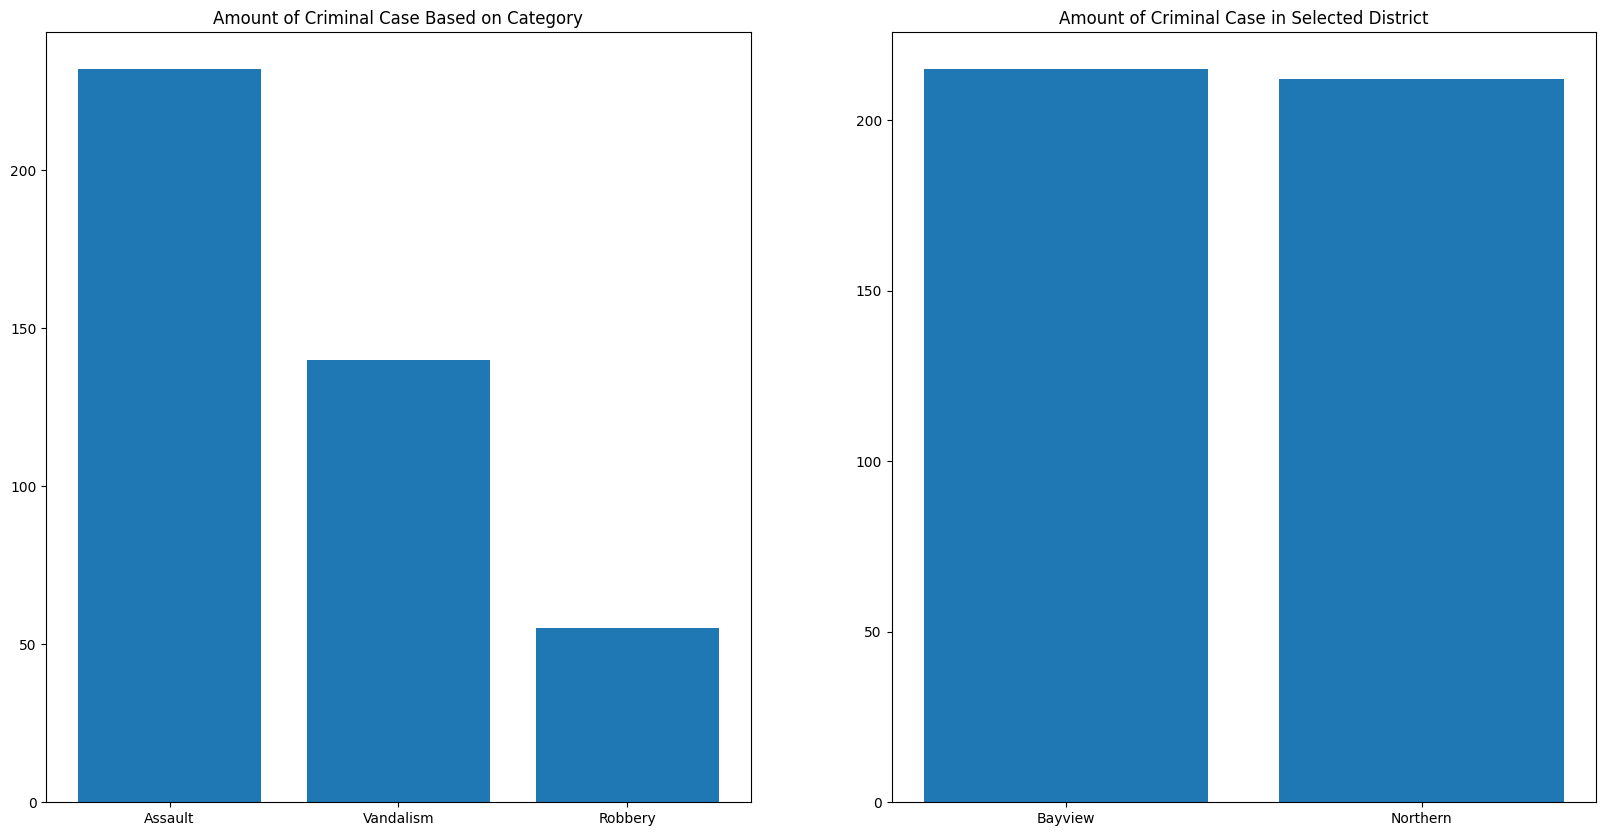

In [9]:
import matplotlib.pyplot as plt

def crime_charts(df):
    cat_unique = df['Category'].value_counts()
    cat_unique = cat_unique.reset_index()

    dist_unique = df['PdDistrict'].value_counts()
    dist_unique = dist_unique.reset_index()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

    ax1.bar(cat_unique['Category'], cat_unique['count'])
    ax1.set_title('Amount of Criminal Case Based on Category')
    ax2.bar(dist_unique['PdDistrict'], dist_unique['count'])
    ax2.set_title('Amount of Criminal Case in Selected District')

    display(fig)
    plt.close(fig)

crime_charts(dff_crime)

In [10]:
import folium
import folium.plugins


def crime_map(df):
    latitude = 37.77
    longitude = -122.42

    sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

    incidents = folium.plugins.MarkerCluster().add_to(sanfran_map)

    # loop through the dataframe and add each data point to the mark cluster
    for lat, lng, label, in zip(df.Y, df.X, df.Category):
        folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
        ).add_to(incidents)

    # show map
    display(sanfran_map)
crime_map(dff_crime.iloc[0:50, :])

In [11]:
import solara
districts = solara.reactive(['Bayview', 'Northern'],)
categories = solara.reactive(['Vandalism', 'Assault', 'Robbery'])
limit = solara.reactive(100)

In [12]:
@solara.component
def View():
    dff = crime_filter(df_crime, districts.value, categories.value)
    row_count = len(dff)
    if row_count > limit.value:
        solara.Warning(f"Only showing the first {limit.value} of {row_count:,} crimes on map")
    crime_map(dff.iloc[:limit.value])
    if row_count > 0:
        crime_charts(dff)
    else:
        solara.Warning("You filtered out all the data, no charts shown")
View()

<IPython.core.display.Javascript object>

Cannot show ipywidgets in text

In [13]:
limit.value = 70
districts.value = ['Soutern', 'Northern']

In [14]:
@solara.component
def Controls():
    solara.SelectMultiple('District', all_values=[str(k) for k in df_crime['PdDistrict'].unique().tolist()], values=districts)
    solara.SelectMultiple('Category', all_values=[str(k) for k in df_crime['Category'].unique().tolist()], values=categories)
    solara.Text("Maximum number of rows to show on map")
    solara.SliderInt('', value=limit, min=1, max=1000)
Controls()

Cannot show ipywidgets in text

In [15]:
# Note that we can read AND write reactive variables
categories.value = [*categories.value, 'Warrants']

In [16]:
@solara.component
def Page():
    with solara.Sidebar():
        Controls()
    View()
Page()

Cannot show ipywidgets in text